In [2]:
import numpy as np 
#from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df.shape

(2075259, 7)

### Dealing with missing values  'nan' with a test statistic

In [8]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [9]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [10]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.mean())

In [11]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df['Sub_metering_4'] = (df['Global_active_power']* 1000/60) - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']

In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [14]:
df_daily = df.resample('D').mean()

In [15]:
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


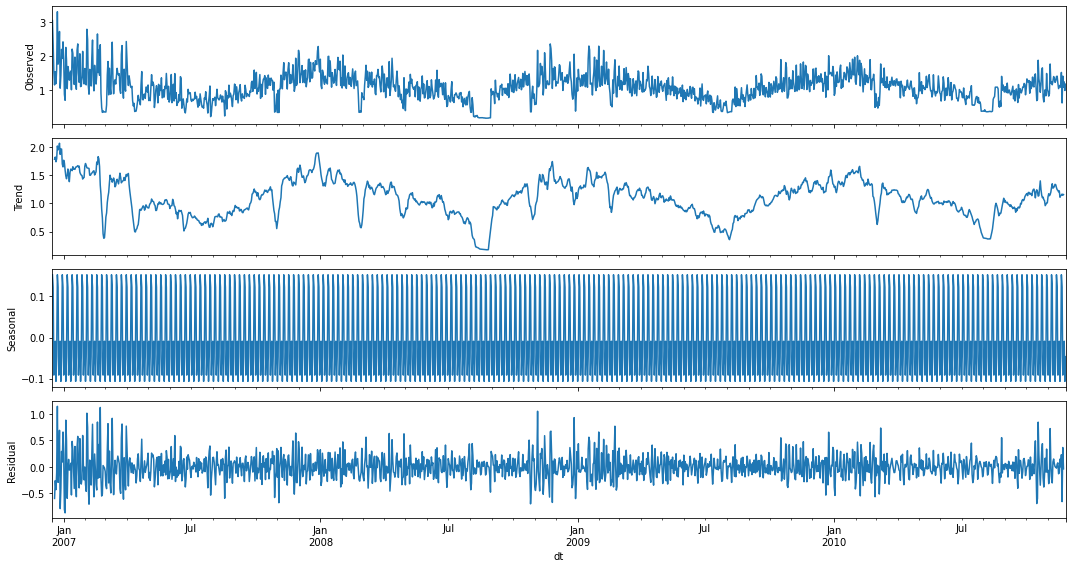

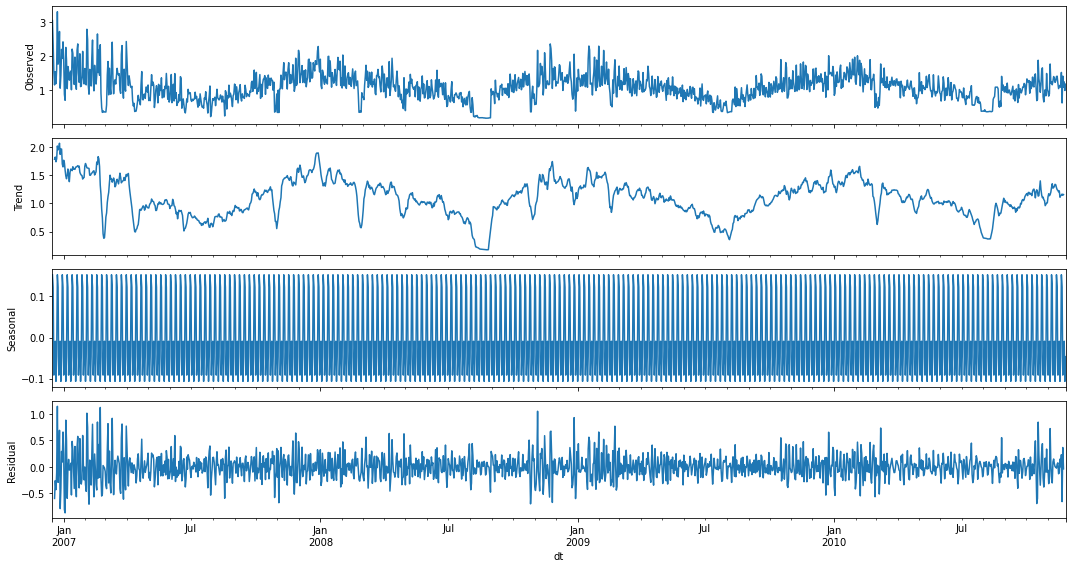

In [16]:
rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df_daily['Global_active_power'], model = 'additive')
decompose_series.plot()

In [ ]:
#rcParams['figure.figsize'] = 15,8
#decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], freq = 60*24, model = 'additive')
#decompose_series.plot()

In [17]:
ga = df['Global_active_power']

In [18]:
#determining rolling statistic
rolmean = ga.rolling(window=1440).mean()

rolstd = ga.rolling(window=1440).std()
print(rolmean, rolstd)

dt
2006-12-16 17:24:00         NaN
2006-12-16 17:25:00         NaN
2006-12-16 17:26:00         NaN
2006-12-16 17:27:00         NaN
2006-12-16 17:28:00         NaN
                         ...   
2010-11-26 20:58:00    1.179669
2010-11-26 20:59:00    1.179271
2010-11-26 21:00:00    1.178872
2010-11-26 21:01:00    1.178474
2010-11-26 21:02:00    1.178078
Name: Global_active_power, Length: 2075259, dtype: float64 dt
2006-12-16 17:24:00         NaN
2006-12-16 17:25:00         NaN
2006-12-16 17:26:00         NaN
2006-12-16 17:27:00         NaN
2006-12-16 17:28:00         NaN
                         ...   
2010-11-26 20:58:00    0.803781
2010-11-26 20:59:00    0.803756
2010-11-26 21:00:00    0.803733
2010-11-26 21:01:00    0.803712
2010-11-26 21:02:00    0.803693
Name: Global_active_power, Length: 2075259, dtype: float64


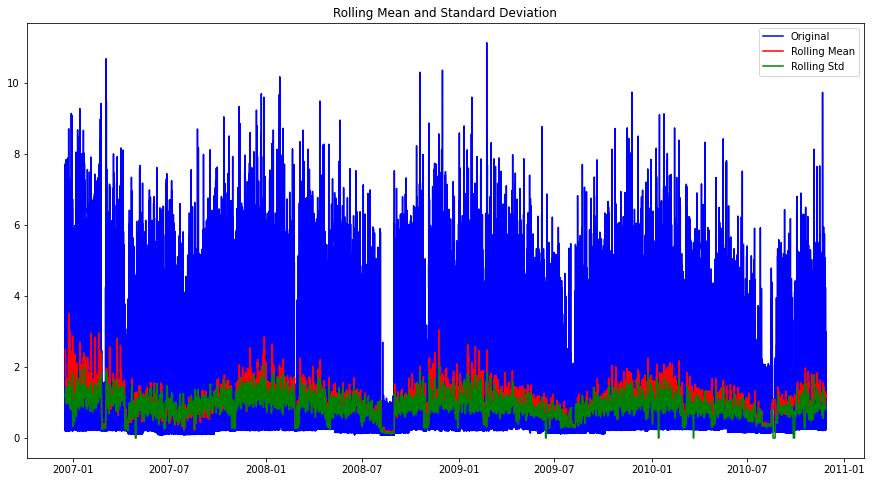

In [19]:
#plot rolling statistics
orig = plt.plot(ga, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [20]:
#df_daily = df.resample('D').mean()

In [21]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('criitical values:')
for k, v in adf_result[4].items():
    print(f'  {k}: {v}')

ADF Statistic: -3.708239982722004
p-value: 0.003998733004312859
No. of lags used: 22
No. of observations used: 1419
criitical values:
  1%: -3.434966750462565
  5%: -2.8635789736973725
  10%: -2.5678555388041384


The test statistic is less than the critical value, so we reject the null hypothesis ( the series is stationary).

### Time Series Forecasting using Stochastic Models

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

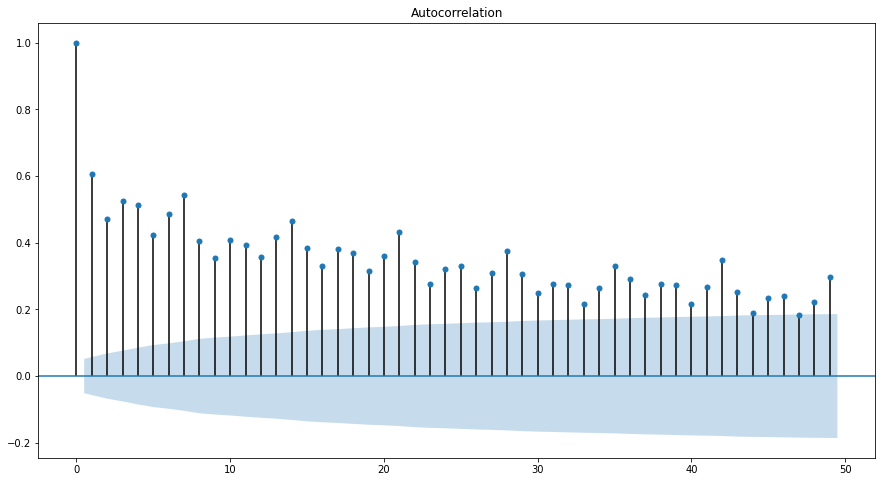

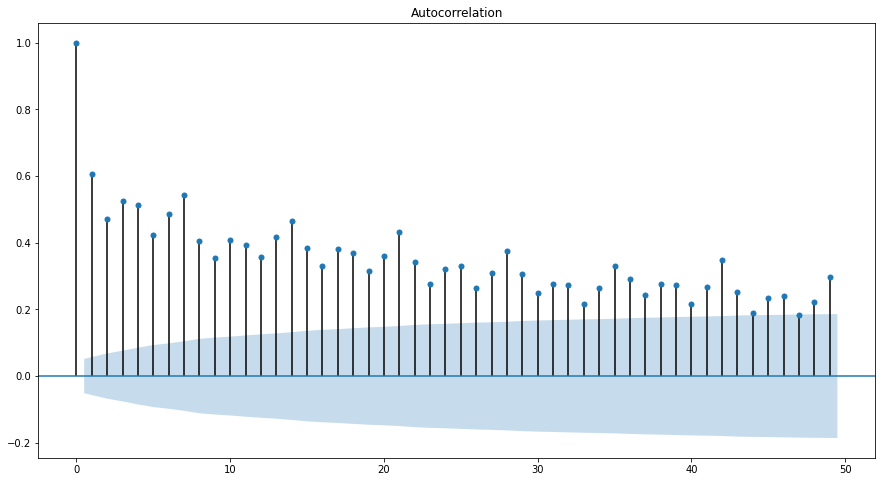

In [23]:
#ACF
plot_acf(df_daily['Global_active_power'], lags = range(0,50))

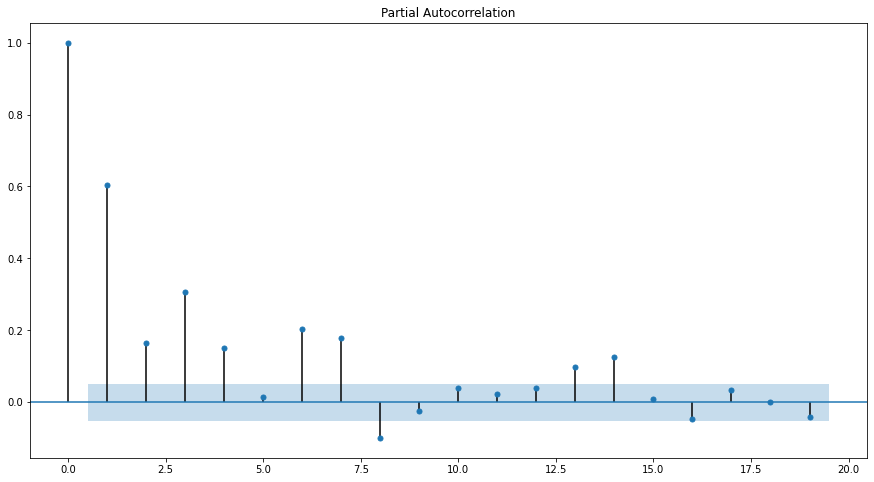

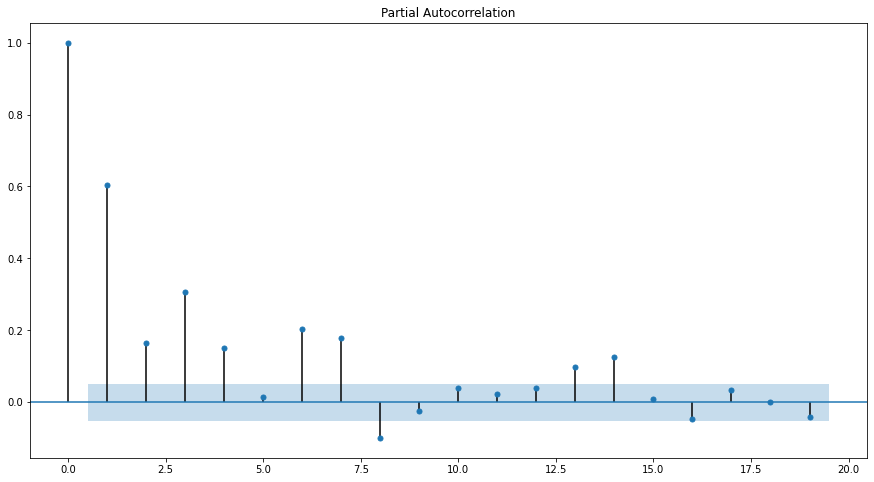

In [24]:
#PACF
plot_pacf(df_daily['Global_active_power'], lags = range(0, 20))

ar(p) = 4
ma(q) =47

In [25]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [26]:
model = ARMA(df_daily['Global_active_power'], order=(4,0))
result = model.fit()

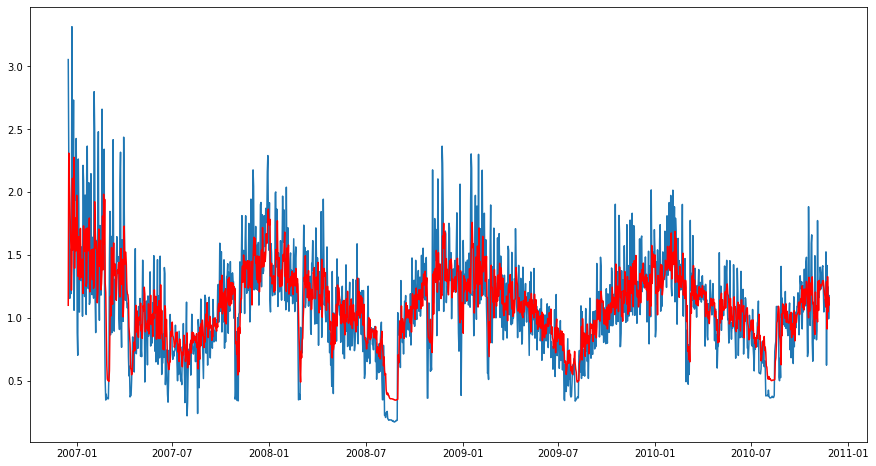

In [27]:
plt.plot(df_daily['Global_active_power'])
plt.plot(result.fittedvalues, color = 'red')

### Time Series at Scale

In [28]:
from fbprophet import Prophet

In [29]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [30]:
df_daily.shape

(1442, 8)

In [31]:
d=df_daily.reset_index()

In [32]:
d

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111
...,...,...,...,...,...,...,...,...,...
1437,2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,11.753194
1438,2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,11.355741
1439,2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,9.562130
1440,2010-11-25,0.993864,0.080644,241.536257,4.169444,0.747222,0.295833,3.522222,11.999120


In [33]:
df_new = d[['dt', 'Global_active_power']]

In [34]:
df_new.head()

,dt,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [35]:
df_new = df_new.rename(columns = {'dt': 'ds','Global_active_power': 'y'})
df_new.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [36]:
model = Prophet()
model.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.234471,1.380083,2.135531,1.234471,1.234471,0.520846,0.520846,0.520846,0.158174,0.158174,0.158174,0.362671,0.362671,0.362671,0.0,0.0,0.0,1.755317
1,2006-12-17,1.233609,1.360600,2.103756,1.233609,1.233609,0.495576,0.495576,0.495576,0.124488,0.124488,0.124488,0.371089,0.371089,0.371089,0.0,0.0,0.0,1.729185
2,2006-12-18,1.232747,1.141188,1.881795,1.232747,1.232747,0.286956,0.286956,0.286956,-0.092324,-0.092324,-0.092324,0.379280,0.379280,0.379280,0.0,0.0,0.0,1.519703
3,2006-12-19,1.231885,1.212053,1.994917,1.231885,1.231885,0.364323,0.364323,0.364323,-0.022686,-0.022686,-0.022686,0.387009,0.387009,0.387009,0.0,0.0,0.0,1.596209
4,2006-12-20,1.231023,1.237950,2.006111,1.231023,1.231023,0.384218,0.384218,0.384218,-0.009827,-0.009827,-0.009827,0.394045,0.394045,0.394045,0.0,0.0,0.0,1.615241


In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.234471,1.380083,2.135531,1.234471,1.234471,0.520846,0.520846,0.520846,0.158174,0.158174,0.158174,0.362671,0.362671,0.362671,0.0,0.0,0.0,1.755317
1,2006-12-17,1.233609,1.360600,2.103756,1.233609,1.233609,0.495576,0.495576,0.495576,0.124488,0.124488,0.124488,0.371089,0.371089,0.371089,0.0,0.0,0.0,1.729185
2,2006-12-18,1.232747,1.141188,1.881795,1.232747,1.232747,0.286956,0.286956,0.286956,-0.092324,-0.092324,-0.092324,0.379280,0.379280,0.379280,0.0,0.0,0.0,1.519703
3,2006-12-19,1.231885,1.212053,1.994917,1.231885,1.231885,0.364323,0.364323,0.364323,-0.022686,-0.022686,-0.022686,0.387009,0.387009,0.387009,0.0,0.0,0.0,1.596209
4,2006-12-20,1.231023,1.237950,2.006111,1.231023,1.231023,0.384218,0.384218,0.384218,-0.009827,-0.009827,-0.009827,0.394045,0.394045,0.394045,0.0,0.0,0.0,1.615241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2010-12-02,1.099840,0.918064,1.666159,1.099840,1.099840,0.205791,0.205791,0.205791,-0.109284,-0.109284,-0.109284,0.315074,0.315074,0.315074,0.0,0.0,0.0,1.305631
1448,2010-12-03,1.099879,0.981039,1.738904,1.099879,1.099879,0.264090,0.264090,0.264090,-0.048541,-0.048541,-0.048541,0.312632,0.312632,0.312632,0.0,0.0,0.0,1.363969
1449,2010-12-04,1.099918,1.184474,1.934910,1.099918,1.099918,0.468963,0.468963,0.468963,0.158174,0.158174,0.158174,0.310789,0.310789,0.310789,0.0,0.0,0.0,1.568881
1450,2010-12-05,1.099957,1.181563,1.907924,1.099957,1.099957,0.434212,0.434212,0.434212,0.124488,0.124488,0.124488,0.309724,0.309724,0.309724,0.0,0.0,0.0,1.534169


In [39]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1447,2010-12-02,1.099840,0.918064,1.666159,1.099840,1.099840,0.205791,0.205791,0.205791,-0.109284,-0.109284,-0.109284,0.315074,0.315074,0.315074,0.0,0.0,0.0,1.305631
1448,2010-12-03,1.099879,0.981039,1.738904,1.099879,1.099879,0.264090,0.264090,0.264090,-0.048541,-0.048541,-0.048541,0.312632,0.312632,0.312632,0.0,0.0,0.0,1.363969
1449,2010-12-04,1.099918,1.184474,1.934910,1.099918,1.099918,0.468963,0.468963,0.468963,0.158174,0.158174,0.158174,0.310789,0.310789,0.310789,0.0,0.0,0.0,1.568881
1450,2010-12-05,1.099957,1.181563,1.907924,1.099957,1.099957,0.434212,0.434212,0.434212,0.124488,0.124488,0.124488,0.309724,0.309724,0.309724,0.0,0.0,0.0,1.534169
1451,2010-12-06,1.099997,0.952678,1.659668,1.099997,1.099997,0.217261,0.217261,0.217261,-0.092324,-0.092324,-0.092324,0.309585,0.309585,0.309585,0.0,0.0,0.0,1.317257


In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1.755317,1.380083,2.135531,1.234471,1.234471,1.234471
1,2006-12-17,1.729185,1.360600,2.103756,1.233609,1.233609,1.233609
2,2006-12-18,1.519703,1.141188,1.881795,1.232747,1.232747,1.232747
3,2006-12-19,1.596209,1.212053,1.994917,1.231885,1.231885,1.231885
4,2006-12-20,1.615241,1.237950,2.006111,1.231023,1.231023,1.231023
...,...,...,...,...,...,...,...
1447,2010-12-02,1.305631,0.918064,1.666159,1.099840,1.099840,1.099840
1448,2010-12-03,1.363969,0.981039,1.738904,1.099879,1.099879,1.099879
1449,2010-12-04,1.568881,1.184474,1.934910,1.099918,1.099918,1.099918
1450,2010-12-05,1.534169,1.181563,1.907924,1.099957,1.099957,1.099957


In [ ]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

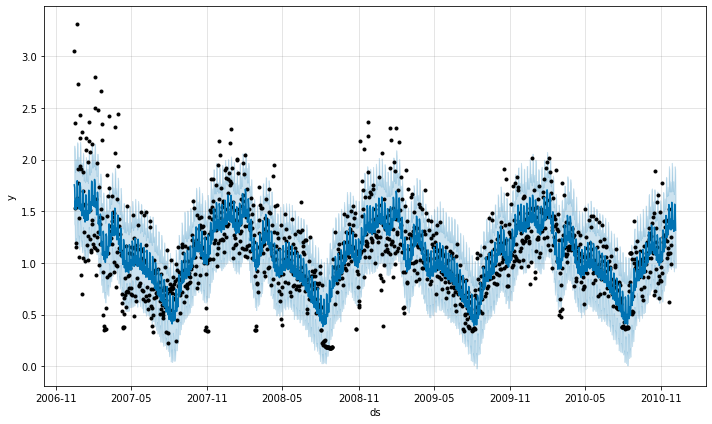

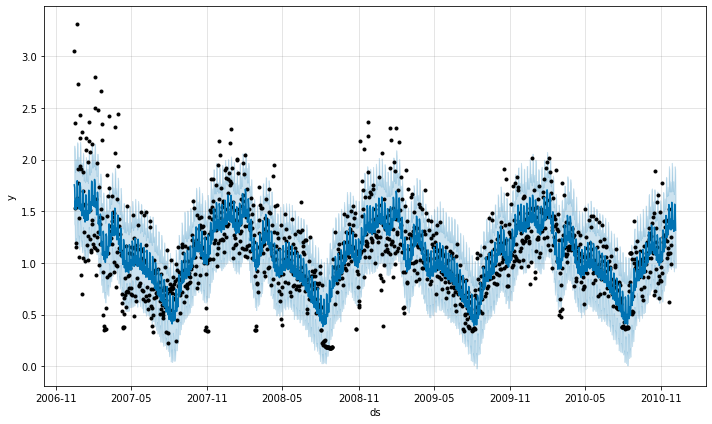

In [41]:
model.plot(forecast)

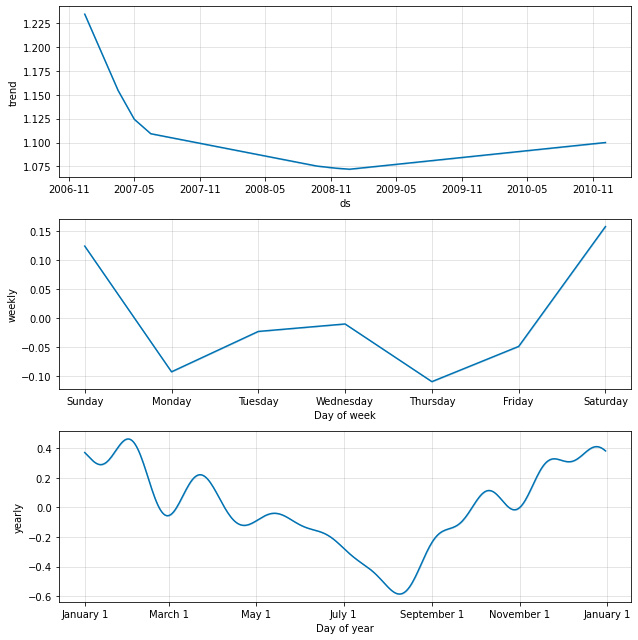

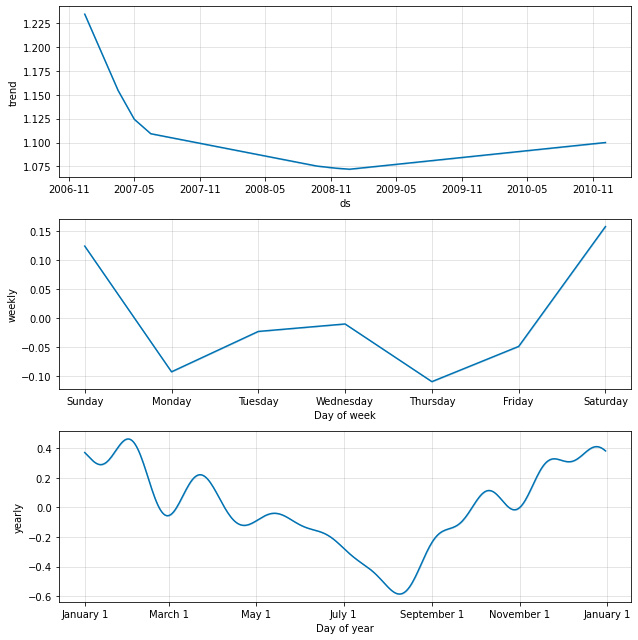

In [42]:
model.plot_components(forecast)

In [43]:
df_daily.shape

(1442, 8)

In [44]:
from fbprophet.diagnostics import cross_validation

In [45]:
#df_cv=cross_validation(model,horizon="1 days",period='10 days',initial='400 days')

800 days total dataset
initial = 624 == size of train dataset
horizon = 20 == size to be forecasted
period = 10 (default = 1/2 of horizon) == spacing between cutoff dates as incremental

1st Iteration: Train on 1-624, Forecast for 625-644
2nd Iteration: Train on 11-634, Forecast for 635-654
3rd Iteration: Train on 21-644, Forecast for 645-664

so the last 20% can be used in the cross validation on different time frames

In [46]:
df_cv=cross_validation(model,horizon="200 days",period='100 days',initial='1153 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2010-05-10 00:00:00 and 2010-05-10 00:00:00


In [47]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-05-11,0.993145,0.608046,1.368791,1.091228,2010-05-10
1,2010-05-12,1.003350,0.629678,1.367037,1.413485,2010-05-10
2,2010-05-13,0.893541,0.531272,1.282558,1.078880,2010-05-10
3,2010-05-14,0.965478,0.557807,1.359096,1.195935,2010-05-10
4,2010-05-15,1.186007,0.800487,1.557490,1.350536,2010-05-10
...,...,...,...,...,...,...
195,2010-11-22,1.331209,0.945396,1.714883,1.417733,2010-05-10
196,2010-11-23,1.423804,1.016379,1.790670,1.095511,2010-05-10
197,2010-11-24,1.434424,1.050481,1.816838,1.247394,2010-05-10
198,2010-11-25,1.323520,0.948561,1.674446,0.993864,2010-05-10


cv_results = cross_validation( model = prophet, initial='1825 days', period='30 days', horizon = '60 days')
I struggled with this for a while as well. But here is how it works. The initial model will be trained on the first 1,825 days of data. It will forecast the next 60 days of data (because horizon is set to 60). The model will then train on the initial period + the period (1,825 + 30 days in this case) and forecast the next 60 days. It will continued like this, adding another 30 days to the training data and then forecasting for the next 60 until there is no longer enough data to do this.

In summary, period is how much data to add to the training data set in every iteration of cross-validation, and horizon is how far out it will forecast

In [48]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,20 days,0.033117,0.181982,0.142537,0.118967,0.099585,0.95
1,21 days,0.033119,0.181985,0.142544,0.119748,0.105417,0.95
2,22 days,0.024759,0.157351,0.123637,0.107055,0.099585,1.00
3,23 days,0.025762,0.160505,0.126032,0.115587,0.099585,1.00
4,24 days,0.024577,0.156772,0.123085,0.114809,0.099585,1.00


In [49]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,20 days,0.033117,0.181982,0.142537,0.118967,0.099585,0.95
1,21 days,0.033119,0.181985,0.142544,0.119748,0.105417,0.95
2,22 days,0.024759,0.157351,0.123637,0.107055,0.099585,1.00
3,23 days,0.025762,0.160505,0.126032,0.115587,0.099585,1.00
4,24 days,0.024577,0.156772,0.123085,0.114809,0.099585,1.00
...,...,...,...,...,...,...,...
176,196 days,0.099439,0.315340,0.208638,0.200971,0.107264,0.90
177,197 days,0.103443,0.321626,0.216732,0.206690,0.107264,0.90
178,198 days,0.072623,0.269487,0.185729,0.191445,0.107264,0.95
179,199 days,0.076920,0.277345,0.194675,0.201777,0.107264,0.95


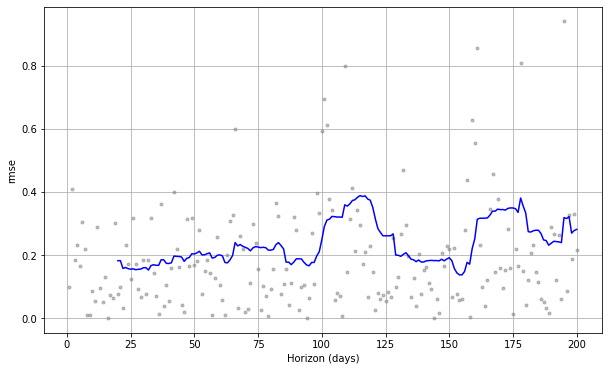

In [50]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

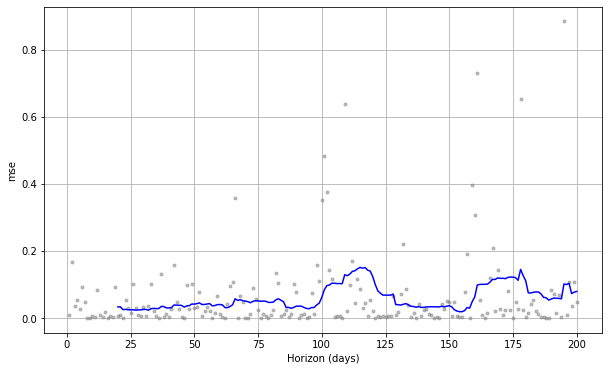

In [51]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

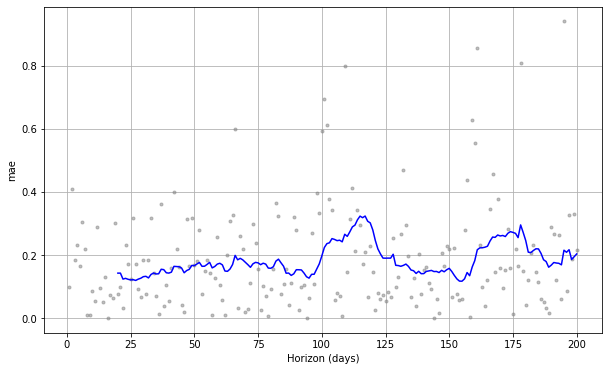

In [52]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mae')

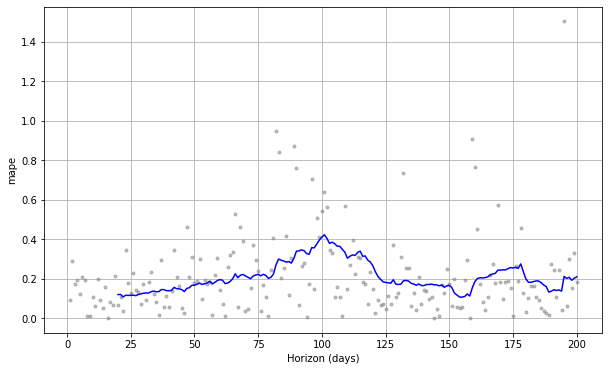

In [53]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')